In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
'Ashwin Raja 10th and 12th marksheet.pdf'
 asteriod
'BFS and Astar.gslides'
'CD Lab exp 1.gdoc'
 Classroom
'Colab Notebooks'
'Copy of IMPLEMENTATION OF SYMBOL TABLE.gdoc'
 ct2-002.pdf
'ct2 ga 002.pdf'
 ct3-002.pdf
'ct3 ga 002.pdf'
'ct3 gw 002.pdf'
'Game design .pdf'
 generate_train.py
'My Drive'
 participants
'pixel art (1).pdf'
'pixel art (2).pdf'
'pixel art.pdf'
'PPT-DM-UNIT4-GROUP THEORY-REV 1.gslides'
'Sample Resume ESP 002.gdoc'
'weights backup '
 yolov3


In [ ]:
!cp /mydrive/asteriod/dataset.csv ./

In [ ]:
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mlxtend
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('dataset.csv')
ast=df.head(100)

print(df.shape)
print(df.describe())

#df = df.sample(frac=0.01, random_state = 42)
df.drop(['name','equinox','pdes','id','prefix','spkid','full_name'],axis=1,inplace=True)


print(df.pha.value_counts()) #how many belong to each class of target variable

threat=df[df.pha=='Y']
non_threat=df[df.pha=='N']
outlier_percentage=(df.pha.value_counts()[1]/df.pha.value_counts()[0])*100
print('Potential threat asteroids are: %.3f%%'%outlier_percentage)
print('Threat asteroids: ',len(threat))
print('Non-Threat asteroids: ',len(non_threat))

(958524, 45)
              spkid              H       diameter         albedo  \
count  9.585240e+05  952261.000000  136209.000000  135103.000000   
mean   3.810114e+06      16.906411       5.506429       0.130627   
std    6.831541e+06       1.790405       9.425164       0.110323   
min    2.000001e+06      -1.100000       0.002500       0.001000   
25%    2.239632e+06      16.100000       2.780000       0.053000   
50%    2.479262e+06      16.900000       3.972000       0.079000   
75%    3.752518e+06      17.714000       5.765000       0.190000   
max    5.401723e+07      33.200000     939.400000       1.000000   

       diameter_sigma         epoch      epoch_mjd     epoch_cal  \
count   136081.000000  9.585240e+05  958524.000000  9.585240e+05   
mean         0.479184  2.458869e+06   58868.781950  2.019693e+07   
std          0.782895  7.016716e+02     701.671573  1.930354e+04   
min          0.000500  2.425052e+06   25051.000000  1.927062e+07   
25%          0.180000  2.459000e+0

In [ ]:
null_cutoff=0.5


def numericalCategoricalSplit(df):
    numerical_features=df.select_dtypes(exclude=['object']).columns
    categorical_features=df.select_dtypes(include=['object']).columns
    numerical_data=df[numerical_features]
    categorical_data=df[categorical_features]
    return(numerical_data,categorical_data)
numerical=numericalCategoricalSplit(df)[0]
categorical=numericalCategoricalSplit(df)[1]



In [ ]:

def nullFind(df):
    null_numerical=pd.isnull(df).sum().sort_values(ascending=False)
    #null_numerical=null_numerical[null_numerical>=0]
    null_categorical=pd.isnull(df).sum().sort_values(ascending=False)
   # null_categorical=null_categorical[null_categorical>=0]
    return(null_numerical,null_categorical)
null_numerical=nullFind(numerical)[0]
null_categorical=nullFind(categorical)[1]


null=pd.concat([null_numerical,null_categorical])
null_df=pd.DataFrame({'Null_in_Data':null}).sort_values(by=['Null_in_Data'],ascending=False)
null_df_many=(null_df.loc[(null_df.Null_in_Data>null_cutoff*len(df))])
null_df_few=(null_df.loc[(null_df.Null_in_Data!=0)&(null_df.Null_in_Data<null_cutoff*len(df))])


many_null_col_list=null_df_many.index
few_null_col_list=null_df_few.index

#remove many null columns
df_wo_null=df.drop(many_null_col_list,axis=1)
def removeNullRows(df):
    for col in few_null_col_list:
        df=df[df[col].notnull()]
    return(df)
    
df_wo_null=(removeNullRows(df_wo_null)) 

#dividing the X and the y
X=df_wo_null.drop(['pha'], axis=1)
y=df_wo_null.pha




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)




from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions as plot_dr 


In [ ]:
logreg=LogisticRegression()
SVM=SVC()
knn=KNeighborsClassifier()
gnb=GaussianNB()
etree=ExtraTreesClassifier(random_state=42)
rforest=RandomForestClassifier(random_state=42)



scaler=StandardScaler()
ohe=OneHotEncoder(sparse=False)
le=LabelEncoder()

features=X_train.columns.tolist()

X_train[categorical.columns.drop('pha')]=X_train[categorical.columns.drop('pha')].apply(le.fit_transform)
X_test[categorical.columns.drop('pha')]=X_test[categorical.columns.drop('pha')].apply(le.fit_transform)
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)



X_train_scaled=scaler.fit_transform(X_train) 
X_test_scaled=scaler.fit_transform(X_test) 




Feature: 0, Score: 0.05723
Feature: 1, Score: 0.16971
Feature: 2, Score: 0.02370
Feature: 3, Score: 0.00913
Feature: 4, Score: 0.00768
Feature: 5, Score: 0.00894
Feature: 6, Score: 0.04034
Feature: 7, Score: 0.01707
Feature: 8, Score: 0.03944
Feature: 9, Score: 0.03156
Feature: 10, Score: 0.01612
Feature: 11, Score: 0.01814
Feature: 12, Score: 0.01783
Feature: 13, Score: 0.01943
Feature: 14, Score: 0.02111
Feature: 15, Score: 0.01780
Feature: 16, Score: 0.01755
Feature: 17, Score: 0.01748
Feature: 18, Score: 0.01740
Feature: 19, Score: 0.11945
Feature: 20, Score: 0.11683
Feature: 21, Score: 0.02623
Feature: 22, Score: 0.01401
Feature: 23, Score: 0.00614
Feature: 24, Score: 0.02386
Feature: 25, Score: 0.01309
Feature: 26, Score: 0.00032
Feature: 27, Score: 0.00112
Feature: 28, Score: 0.01369
Feature: 29, Score: 0.02936
Feature: 30, Score: 0.00009
Feature: 31, Score: 0.00659
Feature: 32, Score: 0.04389
Feature: 33, Score: 0.01769
Execution Time for feature selection: 0.21 minutes


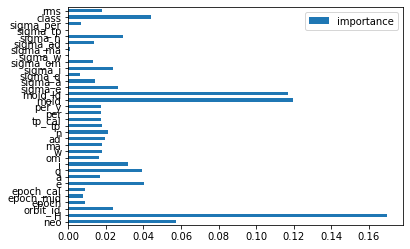

In [ ]:
#feature selection
start_time = timeit.default_timer()
mod=etree
# fit the model
mod.fit(X_train_scaled, y_train)
# get importance
importance = mod.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
df_importance=pd.DataFrame({'importance':importance},index=features)
df_importance.plot(kind='barh')
#plt.bar([x for x in range(len(importance))], importance)
elapsed = timeit.default_timer() - start_time
print('Execution Time for feature selection: %.2f minutes'%(elapsed/60))


In [ ]:
feature_imp=list(zip(features,importance))
feature_sort=sorted(feature_imp, key = lambda x: x[1]) 
n_top_features=20
top_features=list(list(zip(*feature_sort[-n_top_features:]))[0])

X_train_sfs=X_train[top_features]
X_test_sfs=X_test[top_features]

X_train_sfs_scaled=scaler.fit_transform(X_train_sfs)
X_test_sfs_scaled=scaler.fit_transform(X_test_sfs)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from sklearn.metrics import  confusion_matrix,classification_report,matthews_corrcoef
import tensorflow as tf  




In [ ]:
def LearningCurve(history):
    # summarize history for accuracy
    plt.subplot(211)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    
def PerformanceReports(conf_matrix,class_report,labels):
    ax= plt.subplot()
    sns.heatmap(conf_matrix, annot=True,ax=ax)
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels') 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels[::-1])
    plt.show()
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True)
    plt.show()


def NNmodel(init_mode,act,opt,n_top_features=n_top_features):
    np.random.seed(42)  
    tf.random.set_seed(42)
    
    # building a linear stack of layers with the sequential model
    model = Sequential()
    
    # hidden layer
    
    model.add(Dense(16,input_dim=n_top_features, kernel_initializer=init_mode, activation=act))
    model.add(Dropout(0.2))
    model.add(Dense(16, kernel_initializer=init_mode,activation=act))
    model.add(Dropout(0.2))
    
   
    # output layer
    model.add(Dense(1, activation='sigmoid'))
    
    
    # compiling the sequential model
    
    model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=opt)
    return model

def NNperformance(init_mode,act,opt,n_top_features,epochs,batch_size,labels,X_train_sfs_scaled, y_train,X_test_sfs_scaled, y_test):
    np.random.seed(42)  
    tf.random.set_seed(42)
    
    #fit the keras model on the dataset
    start_time = timeit.default_timer()
    #weights = {0:2, 1:100}
    model=NNmodel(init_mode,act,opt,n_top_features)
    #history=model.fit(X_train_sfs_scaled, y_train, epochs=4, batch_size=1000,validation_data=(X_test_sfs_scaled, y_test),class_weight=weights, shuffle=True)
    history=model.fit(X_train_sfs_scaled, y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_test_sfs_scaled, y_test), shuffle=True)
    scores_train = model.evaluate(X_train_sfs_scaled, y_train)
    scores_test = model.evaluate(X_test_sfs_scaled, y_test)
    print('Train Accuracy: %.2f' % (scores_train[1]*100))
    print('Test Accuracy: %.2f' % (scores_test[1]*100))
    
    # make class predictions with the model
    #y_pred = model.predict_classes(X_test_sfs_scaled)
    y_pred = np.argmax(model.predict(X_test_sfs_scaled),axis=1)

    """
    predict_x=model.predict(X_test) 
    classes_x=np.argmax(predict_x,axis=1)

    predictions = np.argmax(model.predict(x_test),axis=1)
    """
    
    cm=confusion_matrix(y_test,y_pred)
    print('Confusion Matrix: ',cm)
    cr=classification_report(y_test, y_pred,target_names=labels,output_dict=True)
    print('Classification Report: ',classification_report(y_test, y_pred))
    mcc= matthews_corrcoef(y_test, y_pred)
    print('Matthews Correlation Coefficient: ',mcc)

    PerformanceReports(cm,cr,labels)
                     
    elapsed = timeit.default_timer() - start_time
    print('Execution Time for deep learning model: %.2f minutes'%(elapsed/60))
    
    LearningCurve(history)   
    
    


In [ ]:
batch_size = 64
epochs = 10


from keras.wrappers.scikit_learn import KerasClassifier
model_CV = KerasClassifier(build_fn=NNmodel, epochs=epochs, 
                           batch_size=batch_size, verbose=1)
# define the grid search parameters
#init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']


init_mode = ['he_uniform','glorot_uniform']
act=['relu','selu','tanh']
opt=['rmsprop','adam']
param_distributions={'init_mode':init_mode,'act':act,'opt':opt}




rand = RandomizedSearchCV(estimator=model_CV, param_distributions=param_distributions, n_jobs=-1, cv=3,random_state=42,verbose=10)
rand_result = rand.fit(X_train_sfs_scaled, y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/10
10198/10198 [==============================] - 41s 4ms/step - loss: 0.0162 - acc: 0.9948
Epoch 2/10
10198/10198 [==============================] - 41s 4ms/step - loss: 0.0061 - acc: 0.9975
Epoch 3/10
10198/10198 [==============================] - 40s 4ms/step - loss: 0.0054 - acc: 0.9978
Epoch 4/10
10198/10198 [==============================] - 40s 4ms/step - loss: 0.0051 - acc: 0.9978
Epoch 5/10
10198/10198 [==============================] - 41s 4ms/step - loss: 0.0047 - acc: 0.9980
Epoch 6/10
10198/10198 [==============================] - 40s 4ms/step - loss: 0.0046 - acc: 0.9980
Epoch 7/10
10198/10198 [==============================] - 41s 4ms/step - loss: 0.0045 - acc: 0.9980
Epoch 8/10
10198/10198 [==============================] - 41s 4ms/step - loss: 0.0043 - acc: 0.9981
Epoch 9/10
10198/10198 [==============================] - 40s 4ms/step - loss: 0.0043 - acc: 0.9981
Epoch 10/10
10198/10198 [==============

In [ ]:
print(f'Best Accuracy for {rand_result.best_score_} using {rand_result.best_params_}')
means = rand_result.cv_results_['mean_test_score']
stds = rand_result.cv_results_['std_test_score']
params = rand_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')


init_mode=rand_result.best_params_['init_mode']
act=rand_result.best_params_['act']
opt=rand_result.best_params_['opt']

Best Accuracy for 0.9983834822972616 using {'opt': 'adam', 'init_mode': 'glorot_uniform', 'act': 'tanh'}
 mean=0.9979, std=7.662e-05 using {'opt': 'rmsprop', 'init_mode': 'glorot_uniform', 'act': 'tanh'}
 mean=0.9984, std=4.551e-05 using {'opt': 'adam', 'init_mode': 'he_uniform', 'act': 'tanh'}
 mean=0.9978, std=8.097e-05 using {'opt': 'rmsprop', 'init_mode': 'he_uniform', 'act': 'relu'}
 mean=0.9979, std=7.547e-05 using {'opt': 'rmsprop', 'init_mode': 'he_uniform', 'act': 'tanh'}
 mean=0.9983, std=0.0001239 using {'opt': 'adam', 'init_mode': 'he_uniform', 'act': 'selu'}
 mean=0.9979, std=0.0001021 using {'opt': 'rmsprop', 'init_mode': 'glorot_uniform', 'act': 'relu'}
 mean=0.9982, std=9.62e-05 using {'opt': 'adam', 'init_mode': 'he_uniform', 'act': 'relu'}
 mean=0.9984, std=5.258e-05 using {'opt': 'adam', 'init_mode': 'glorot_uniform', 'act': 'tanh'}
 mean=0.998, std=8.145e-05 using {'opt': 'rmsprop', 'init_mode': 'he_uniform', 'act': 'selu'}
 mean=0.9984, std=0.0001121 using {'opt': 

Epoch 1/10
10198/10198 [==============================] - 52s 5ms/step - loss: 0.0162 - acc: 0.9948 - val_loss: 0.0052 - val_acc: 0.9978
Epoch 2/10
10198/10198 [==============================] - 51s 5ms/step - loss: 0.0061 - acc: 0.9975 - val_loss: 0.0044 - val_acc: 0.9980
Epoch 3/10
10198/10198 [==============================] - 51s 5ms/step - loss: 0.0054 - acc: 0.9978 - val_loss: 0.0047 - val_acc: 0.9980
Epoch 4/10
10198/10198 [==============================] - 50s 5ms/step - loss: 0.0051 - acc: 0.9978 - val_loss: 0.0045 - val_acc: 0.9979
Epoch 5/10
10198/10198 [==============================] - 51s 5ms/step - loss: 0.0047 - acc: 0.9980 - val_loss: 0.0036 - val_acc: 0.9983
Epoch 6/10
10198/10198 [==============================] - 51s 5ms/step - loss: 0.0046 - acc: 0.9979 - val_loss: 0.0045 - val_acc: 0.9979
Epoch 7/10
10198/10198 [==============================] - 50s 5ms/step - loss: 0.0045 - acc: 0.9980 - val_loss: 0.0048 - val_acc: 0.9979
Epoch 8/10
10198/10198 [=================

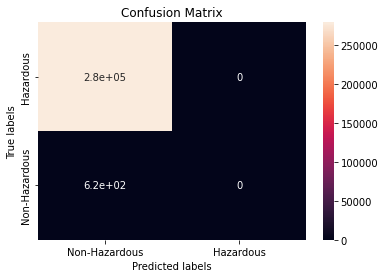

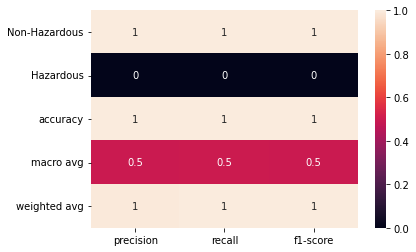

Execution Time for deep learning model: 11.41 minutes


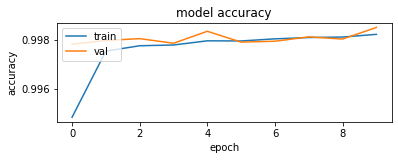

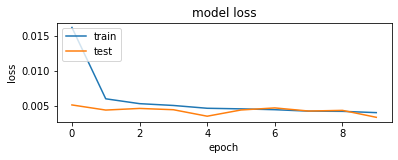

AttributeError: ignored

In [ ]:
labels=['Non-Hazardous','Hazardous']

NNperformance(init_mode,act,opt,n_top_features,epochs,batch_size,labels,X_train_sfs_scaled, y_train,X_test_sfs_scaled, y_test)






In [ ]:
from imblearn.over_sampling import SMOTE,RandomOverSampler,BorderlineSMOTE
from imblearn.under_sampling import NearMiss,RandomUnderSampler
smt = SMOTE()
nr = NearMiss()
bsmt=BorderlineSMOTE(random_state=42)
ros=RandomOverSampler(random_state=42)
rus=RandomUnderSampler(random_state=42)
X_train_bal, y_train_bal = bsmt.fit_resample(X_train_sfs_scaled, y_train)
print(np.bincount(y_train_bal))
  
NNperformance(init_mode,act,opt,n_top_features,epochs,batch_size,labels,X_train_bal, y_train_bal,X_test_sfs_scaled, y_test)


NameError: ignored

8741/8741 [==============================] - 35s 4ms/step - loss: 0.0176 - acc: 0.9960


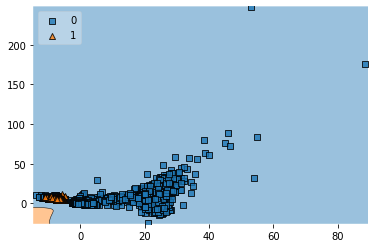

In [ ]:
def plot_classification(model,X_t,y_t):
    clf=model
    pca = PCA(n_components = 2)
    X_t2 = pca.fit_transform(X_t)
    clf.fit(X_t2,np.array(y_t))
    plot_dr(X_t2, np.array(y_t), clf=clf, legend=2)

model_bal=NNmodel(init_mode,act,opt,n_top_features=2)
plot_classification(model_bal,X_test_sfs_scaled, y_test)